In [1]:
# 1.Load Python Libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import scale
from statsmodels.multivariate.pca import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor

C:\Users\chong\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv("Tick_DB.csv")
df

,pid,sid,date,lat,lon,temp,rh,elv,solar,ndvi,t_adult,t_nymph,fid
0,1,CM001,5/12/2017,40.922560,-73.470010,63.850000,47.500000,35.310001,3205.969971,-0.005442,5,0,0
1,1,CM002,5/12/2017,40.922510,-73.470440,62.200000,43.900000,35.220001,2826.209961,0.081311,15,0,1
2,1,CM003,5/12/2017,40.922390,-73.470840,60.900000,44.750000,35.529999,3718.250000,0.270678,9,0,2
3,1,CM004,5/12/2017,40.922400,-73.471120,60.000000,44.000000,34.959999,3551.280029,0.168485,5,0,3
4,1,CM005,5/12/2017,40.922490,-73.471510,60.150000,43.550000,35.150002,3708.169922,0.328292,11,0,4
5,1,CM006,5/12/2017,40.922700,-73.471890,60.500000,44.600000,34.180000,3454.199951,0.280903,7,0,5
6,1,CM007,5/12/2017,40.922720,-73.472150,60.066667,42.766667,34.049999,2635.050049,0.245106,5,0,6
7,1,CM008,5/12/2017,40.922920,-73.472590,63.400000,39.500000,32.400002,3525.209961,0.263070,8,0,7
8,1,CM009,5/12/2017,40.923040,-73.472700,68.033333,34.700000,32.490002,3585.129883,0.136587,19,0,8
9,1,CM010,5/12/2017,40.923170,-73.473130,67.000000,32.700000,34.799999,4286.640137,0.151638,8,0,9


In [3]:
df = df.drop(["pid", "lat", "lat", "fid"], axis=1)
df
#df.columns = ["Temp", "RH", "ELEVATION", "SLOPE", "SOLAR", "TreeCOV", "tick"]

,sid,date,lon,temp,rh,elv,solar,ndvi,t_adult,t_nymph
0,CM001,5/12/2017,-73.470010,63.850000,47.500000,35.310001,3205.969971,-0.005442,5,0
1,CM002,5/12/2017,-73.470440,62.200000,43.900000,35.220001,2826.209961,0.081311,15,0
2,CM003,5/12/2017,-73.470840,60.900000,44.750000,35.529999,3718.250000,0.270678,9,0
3,CM004,5/12/2017,-73.471120,60.000000,44.000000,34.959999,3551.280029,0.168485,5,0
4,CM005,5/12/2017,-73.471510,60.150000,43.550000,35.150002,3708.169922,0.328292,11,0
5,CM006,5/12/2017,-73.471890,60.500000,44.600000,34.180000,3454.199951,0.280903,7,0
6,CM007,5/12/2017,-73.472150,60.066667,42.766667,34.049999,2635.050049,0.245106,5,0
7,CM008,5/12/2017,-73.472590,63.400000,39.500000,32.400002,3525.209961,0.263070,8,0
8,CM009,5/12/2017,-73.472700,68.033333,34.700000,32.490002,3585.129883,0.136587,19,0
9,CM010,5/12/2017,-73.473130,67.000000,32.700000,34.799999,4286.640137,0.151638,8,0


In [4]:
all_sites = df[df.temp.notnull()]
all_sites

,sid,date,lon,temp,rh,elv,solar,ndvi,t_adult,t_nymph
0,CM001,5/12/2017,-73.470010,63.850000,47.500000,35.310001,3205.969971,-0.005442,5,0
1,CM002,5/12/2017,-73.470440,62.200000,43.900000,35.220001,2826.209961,0.081311,15,0
2,CM003,5/12/2017,-73.470840,60.900000,44.750000,35.529999,3718.250000,0.270678,9,0
3,CM004,5/12/2017,-73.471120,60.000000,44.000000,34.959999,3551.280029,0.168485,5,0
4,CM005,5/12/2017,-73.471510,60.150000,43.550000,35.150002,3708.169922,0.328292,11,0
5,CM006,5/12/2017,-73.471890,60.500000,44.600000,34.180000,3454.199951,0.280903,7,0
6,CM007,5/12/2017,-73.472150,60.066667,42.766667,34.049999,2635.050049,0.245106,5,0
7,CM008,5/12/2017,-73.472590,63.400000,39.500000,32.400002,3525.209961,0.263070,8,0
8,CM009,5/12/2017,-73.472700,68.033333,34.700000,32.490002,3585.129883,0.136587,19,0
9,CM010,5/12/2017,-73.473130,67.000000,32.700000,34.799999,4286.640137,0.151638,8,0


In [5]:
res = ["t_adult"]
ind = ["temp", "rh", "elv", "solar", "ndvi"]

vif_cutoff = 5
pvalue_cutoff = 0.05

In [6]:
# 4.Variable Constructor
def Var_Builder(df, dep_y, ind_x):
    y = df[dep_y]
    X = df[ind_x]
    return(y, X)
y, X = Var_Builder(all_sites, res, ind)

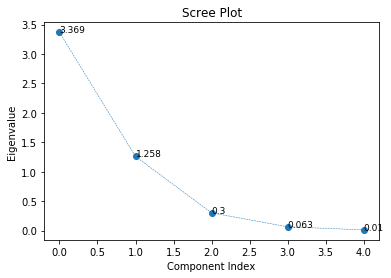

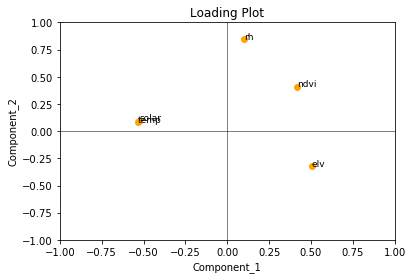

In [7]:
# 5A.Perform Principle Component Analysis
def PCA_Analysis(X):
    var_num = X.shape[1] # Count number of variables involved in PCA
    
    # Initialize PCA
    pca = PCA(X, ncomp=var_num)
    
    # 5A.Compute Eigenvalue Matrix
    eigen_Mat = DataFrame(0, columns=["Eigenvalue", "Variance"], index=np.arange(var_num))
    eigen_Mat["Variance"] = pca.eigenvals / sum(pca.eigenvals)
    eigen_Mat["Eigenvalue"] = pca.eigenvals / sum(pca.eigenvals) * var_num
    
    # 5B.Compute Component Matrix
    ldings = pca.loadings
    comp_Mat = ldings[ldings.columns[0:2]] # Use 2 principle components
    comp_Mat.columns = ["Component_1", "Component_2"]
    return(eigen_Mat, comp_Mat)
scr, ld = PCA_Analysis(X)

# 5B.PCA Result Visualization: Scree Plot & Loading Plot
def PCA_Visualization(eigen_Mat, comp_Mat):
    # Scree Plot
    fig, ax = plt.subplots()
    ax.plot(eigen_Mat.index, eigen_Mat["Eigenvalue"], "--o", linewidth=0.5)
    for i in eigen_Mat.index:
        ax.annotate(round(eigen_Mat.loc[i, "Eigenvalue"], 3), [i, eigen_Mat.loc[i, "Eigenvalue"]], fontsize=9)
    plt.xlabel("Component Index")
    plt.ylabel("Eigenvalue")
    plt.title("Scree Plot")
    fig.savefig("ScreePlot.png", dpi=300)
    plt.show()
    
    # Loading Plot
    fig, ax = plt.subplots()
    ax.scatter(comp_Mat["Component_1"], comp_Mat["Component_2"], color="orange")
    for i in comp_Mat.index:
        ax.annotate(i, [comp_Mat.loc[i, "Component_1"], comp_Mat.loc[i, "Component_2"]], fontsize=9)
    ax.plot([-1.1, 1.1], [0, 0], "k-", linewidth=0.5)
    ax.plot([0, 0], [-1.1, 1.1], "k-", linewidth=0.5)
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("Component_1")
    plt.ylabel("Component_2")
    plt.title("Loading Plot")
    fig.savefig("LoadingPlot.png", dpi=300)
    plt.show()
PCA_Visualization(scr, ld)

In [8]:
# 6.Multiple Regression Model Calibration
def MLR(dep, ind):
    # Fit a MLR Model
    y = dep
    X = sm.add_constant(ind)
    model = sm.OLS(y, X).fit()
    # Produce R-square
    r2 = model.rsquared
    # Produce P-value
    pvalue = model.pvalues
    # Produce Parameters
    params = model.params
    # Produce VIF
    vif = DataFrame(0, index = ind.columns, columns=["Tolerance", "VIF"])
    for var in vif.index:
        try:
            vif.loc[var, "VIF"] = variance_inflation_factor(scale(ind), np.where(vif.index == var)[0])
        except:
            vif.loc[var, "VIF"] = 1.0
    vif["Tolerance"] = 1 / vif["VIF"]
    return(r2, pvalue, vif, params)
r2, pvalue, vif, params = MLR(y, X)

In [9]:
# 7.Merge pvalue table & collinearity diagnostic table
summ_tab = pd.merge(DataFrame(pvalue, columns=["pvalue"]), vif, left_index=True, right_index=True)
#summ_tab.to_csv("MLR_summ1.csv")
summ_tab

,pvalue,Tolerance,VIF
temp,0.242679,0.020570,48.613611
rh,0.693183,0.175680,5.692158
elv,0.520500,0.019437,51.447012
solar,0.770702,0.091647,10.911415
ndvi,0.073727,0.415920,2.404308


In [10]:
# 8A.Remove variable "elv"
res_1 = ["t_adult"]
ind_1 = ["temp", "rh", "solar", "ndvi"]

y1, X1 = Var_Builder(all_sites, res_1, ind_1)
r2_1, pvalue_1, vif_1, params_1 = MLR(y1, X1)
summ_tab_1 = pd.merge(DataFrame(pvalue_1, columns=["pvalue"]), vif_1, left_index=True, right_index=True)
#summ_tab_1.to_csv("MLR_summ2.csv")
summ_tab_1

,pvalue,Tolerance,VIF
temp,0.189468,0.098210,10.182238
rh,0.737314,0.721447,1.386103
solar,0.887551,0.097279,10.279748
ndvi,0.059493,0.422093,2.369144


In [11]:
# 8A.Remove variable "solar"
res_2 = ["t_adult"]
ind_2 = ["temp", "rh", "ndvi"]

y2, X2 = Var_Builder(all_sites, res_2, ind_2)
r2_2, pvalue_2, vif_2, params_2 = MLR(y2, X2)
summ_tab_2 = pd.merge(DataFrame(pvalue_2, columns=["pvalue"]), vif_2, left_index=True, right_index=True)
#summ_tab_2.to_csv("MLR_summ3.csv")
summ_tab_2

,pvalue,Tolerance,VIF
temp,0.000951,0.543348,1.840441
rh,0.749236,0.738666,1.353792
ndvi,0.057224,0.435499,2.296218


In [12]:
# 8A.Remove variable "rh"
res_3 = ["t_adult"]
ind_3 = ["temp", "ndvi"]

y3, X3 = Var_Builder(all_sites, res_3, ind_3)
r2_3, pvalue_3, vif_3, params_3 = MLR(y3, X3)
summ_tab_3 = pd.merge(DataFrame(pvalue_3, columns=["pvalue"]), vif_3, left_index=True, right_index=True)
#summ_tab_3.to_csv("MLR_summ4.csv")
summ_tab_3

,pvalue,Tolerance,VIF
temp,0.000803,0.579784,1.72478
ndvi,0.043243,0.579784,1.72478


In [13]:
r2_3

0.13727022841817249

In [19]:
# 8A.Remove variable "rh"
res_4 = ["t_adult"]
ind_4 = ["temp", "rh"]

y4, X4 = Var_Builder(all_sites, res_4, ind_4)
r2_4, pvalue_4, vif_4, params_4 = MLR(y4, X4)
summ_tab_4 = pd.merge(DataFrame(pvalue_4, columns=["pvalue"]), vif_4, left_index=True, right_index=True)
#summ_tab_3.to_csv("MLR_summ4.csv")
summ_tab_4

,pvalue,Tolerance,VIF
temp,0.005786,0.983394,1.016887
rh,0.468534,0.983394,1.016887


In [20]:
r2_4

0.096170500708107065